# Fit a RL model on hierarchical data

In [1]:
import rlssm
import pandas as pd

## Import the data

In [2]:
# import some example data:
data = rlssm.load_example_dataset(hierarchical_levels = 2)

data.head()

,participant,block_label,trial_block,f_cor,f_inc,cor_option,inc_option,times_seen,rt,accuracy
0,1,1,1,43,39,2,1,1,1.244082,0
1,1,1,2,60,50,4,3,1,1.101821,1
2,1,1,3,44,36,4,2,2,1.029923,0
3,1,1,4,55,55,4,3,2,1.368007,0
4,1,1,5,52,49,4,3,3,1.039329,1


## Initialize the model

In [3]:
# you can "turn on and off" different mechanisms:
model = rlssm.RLModel_2A(hierarchical_levels = 2,
                         increasing_sensitivity = False,
                         separate_learning_rates = True)

Using cached StanModel


## Fit

In [4]:
# sampling parameters
n_warmup = 1000
n_sampling = 3000
n_chains = 2

# learning parameters
K = 4 # n options in a learning block (participants see 2 at a time)
initial_value_learning = 27.5 # intitial learning value (Q0)

In [5]:
model_fit = model.fit(
    data, 
    K, 
    initial_value_learning,
    iter_warmup=n_warmup,
    iter_sampling=n_sampling,
    chains = n_chains)

Fitting the model using the priors:
sensitivity_priors {'mu_mu': 1, 'sd_mu': 30, 'mu_sd': 0, 'sd_sd': 30}
alpha_pos_priors {'mu_mu': 0, 'sd_mu': 1, 'mu_sd': 0, 'sd_sd': 0.1}
alpha_neg_priors {'mu_mu': 0, 'sd_mu': 1, 'mu_sd': 0, 'sd_sd': 0.1}


To run all diagnostics call pystan.check_hmc_diagnostics(fit)


Checks MCMC diagnostics:
n_eff / iter for parameter log_p_t[1] is 0.0002799233707527157!
E-BFMI below 0.2 indicates you may need to reparameterize your model
n_eff / iter for parameter log_p_t[2] is 0.0002799233707527157!
E-BFMI below 0.2 indicates you may need to reparameterize your model
n_eff / iter for parameter log_p_t[81] is 0.0002819023696361508!
E-BFMI below 0.2 indicates you may need to reparameterize your model
n_eff / iter for parameter log_p_t[161] is 0.00028433848233607736!
E-BFMI below 0.2 indicates you may need to reparameterize your model
n_eff / iter for parameter log_p_t[162] is 0.00028433848233607736!
E-BFMI below 0.2 indicates you may need to reparameterize your model
n_eff / iter for parameter log_p_t[241] is 0.0002933653734114046!
E-BFMI below 0.2 indicates you may need to reparameterize your model
n_eff / iter for parameter log_p_t[242] is 0.0002933653734114046!
E-BFMI below 0.2 indicates you may need to reparameterize your model
n_eff / iter for parameter log_p_

### get Rhat

In [6]:
model_fit.rhat.describe()

,rhat
count,87.000000
mean,1.000126
std,0.000572
min,0.999518
25%,0.999702
50%,0.999932
75%,1.000346
max,1.001978


### get wAIC

In [7]:
model_fit.waic

{'lppd': -2585.9186822018128,
 'p_waic': 49.06740318618709,
 'waic': 5269.972170776,
 'waic_se': 90.34698762773861}

## Posteriors

In [8]:
model_fit.samples.describe()

,chain,draw,transf_mu_alpha_pos,transf_mu_alpha_neg,transf_mu_sensitivity,alpha_pos_sbj[1],alpha_pos_sbj[2],alpha_pos_sbj[3],alpha_pos_sbj[4],alpha_pos_sbj[5],...,sensitivity_sbj[18],sensitivity_sbj[19],sensitivity_sbj[20],sensitivity_sbj[21],sensitivity_sbj[22],sensitivity_sbj[23],sensitivity_sbj[24],sensitivity_sbj[25],sensitivity_sbj[26],sensitivity_sbj[27]
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,...,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.500000,999.500000,0.059391,0.240970,0.337773,0.042806,0.012892,0.070399,0.101971,0.102206,...,0.084429,0.312524,0.372647,0.767712,0.588902,0.901913,0.426767,0.606579,0.083444,0.250021
std,0.500063,577.422379,0.011054,0.034860,0.049276,0.021579,0.005417,0.041293,0.045829,0.042308,...,0.054155,0.074492,0.058519,0.176125,0.110758,0.197530,0.076603,0.147913,0.020596,0.050787
min,0.000000,0.000000,0.029233,0.130741,0.208916,0.007275,0.002957,0.001847,0.023123,0.023433,...,0.020625,0.133664,0.207507,0.357291,0.300730,0.443730,0.240316,0.218562,0.023674,0.138294
25%,0.000000,499.750000,0.051704,0.216983,0.303607,0.028721,0.009236,0.046246,0.069185,0.072545,...,0.059548,0.258165,0.331700,0.651809,0.509775,0.760999,0.375488,0.501393,0.069679,0.216377
50%,0.500000,999.500000,0.058487,0.238924,0.333174,0.037555,0.011515,0.066096,0.093490,0.094744,...,0.072125,0.302820,0.366789,0.740668,0.575615,0.876022,0.417441,0.592633,0.081530,0.243665
75%,1.000000,1499.250000,0.066049,0.263020,0.366492,0.051156,0.015136,0.091792,0.123847,0.124971,...,0.088098,0.354502,0.407251,0.849611,0.651033,1.016270,0.469168,0.698397,0.095357,0.274589
max,1.000000,1999.000000,0.112444,0.375415,0.593196,0.202651,0.050444,0.455474,0.370728,0.396222,...,0.720152,0.625586,0.699467,2.335755,1.317175,2.048247,0.975525,1.537778,0.264362,0.748396


In [9]:
import seaborn as sns
sns.set(context = "talk", 
        style = "white", 
        palette = "husl",
        rc={'figure.figsize':(15, 8)})

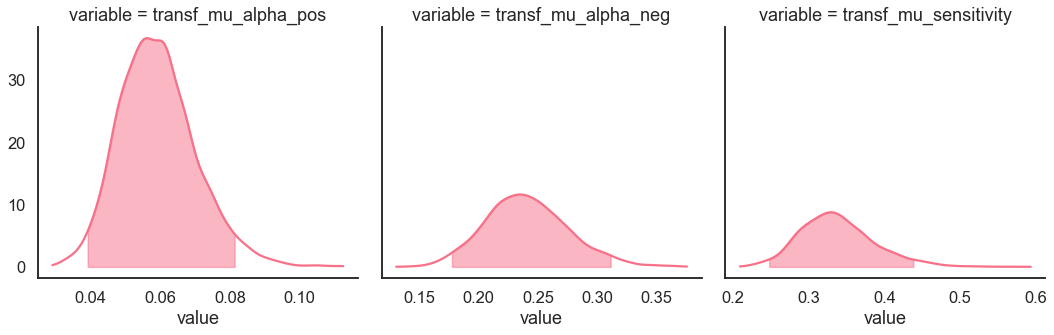

In [10]:
model_fit.plot_posteriors(height=5, show_intervals="HDI", alpha_intervals=.05);

## Posterior predictives

### Ungrouped

In [11]:
pp = model_fit.get_posterior_predictives_df(n_posterior_predictives=500)
pp

variable accuracy                                               ...            \
trial        1    2    3    4    5    6    7    8    9    10    ... 6455 6456   
sample                                                          ...             
1               0    0    1    1    0    1    1    0    1    1  ...    0    0   
2               1    1    1    0    0    0    1    1    1    1  ...    1    0   
3               1    0    0    1    1    0    0    1    1    1  ...    1    1   
4               1    0    1    0    1    1    0    0    1    1  ...    1    1   
5               0    0    0    1    1    0    0    0    1    1  ...    0    1   
...           ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
496             1    0    1    1    1    0    1    0    1    1  ...    1    0   
497             1    0    0    1    0    1    1    0    0    0  ...    1    0   
498             0    0    1    0    0    1    0    0    0    0  ...    1    1   
499             0    0    1    1    0    1    1    1    1    1  ...    1    1   
500             1    1    0    1    0    1    1    1    1    1  ...    1    1   

variable                                          
trial    6457 6458 6459 6460 6461 6462 6463 6464  
sample                                            
1           1    1    1    0    1    0    1    0  
2           1    1    0    1    1    1    1    0  
3           1    1    1    1    1    0    1    0  
4           1    0    1    0    1    0    1    1  
5           1    1    1    1    1    1    0    1  
...       ...  ...  ...  ...  ...  ...  ...  ...  
496         1    0    1    0    1    1    1    1  
497         1    1    1    1    1    1    1    1  
498         1    1    0    1    1    1    1    1  
499         1    0    1    1    0    1    1    0  
500         1    1    1    1    1    0    1    1  

[500 rows x 6464 columns]

In [12]:
pp_summary = model_fit.get_posterior_predictives_summary(n_posterior_predictives=500)
pp_summary

,mean_accuracy
sample,
1,0.793162
2,0.798886
3,0.796101
4,0.796411
5,0.795173
...,...
496,0.799041
497,0.802599
498,0.803837


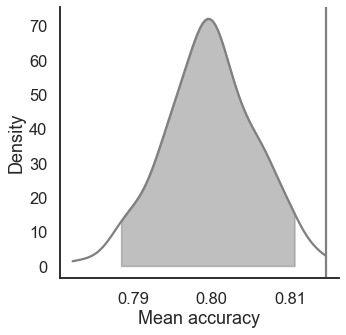

In [13]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(5, 5))

model_fit.plot_mean_posterior_predictives(n_posterior_predictives=500, ax=ax, show_intervals='HDI')

ax.set_ylabel('Density')
ax.set_xlabel('Mean accuracy')

sns.despine()

### Grouped

In [14]:
import numpy as np

In [15]:
# Define new grouping variables, in this case, for the different choice pairs, but any grouping var can do
data['choice_pair'] = 'AB'
data.loc[(data.cor_option == 3) & (data.inc_option == 1), 'choice_pair'] = 'AC'
data.loc[(data.cor_option == 4) & (data.inc_option == 2), 'choice_pair'] = 'BD'
data.loc[(data.cor_option == 4) & (data.inc_option == 3), 'choice_pair'] = 'CD'

data['block_bins'] = pd.cut(data.trial_block, 8, labels=np.arange(1, 9))

In [16]:
model_fit.get_grouped_posterior_predictives_summary(grouping_vars=['block_label', 'block_bins', 'choice_pair'], n_posterior_predictives=500)

mean_accuracy
block_label block_bins choice_pair sample               
1           1          AB          1            0.619048
                                   2            0.587302
                                   3            0.523810
                                   4            0.523810
                                   5            0.523810
...                                                  ...
3           8          CD          496          0.833333
                                   497          0.703704
                                   498          0.685185
                                   499          0.740741
                                   500          0.814815

[48000 rows x 1 columns]

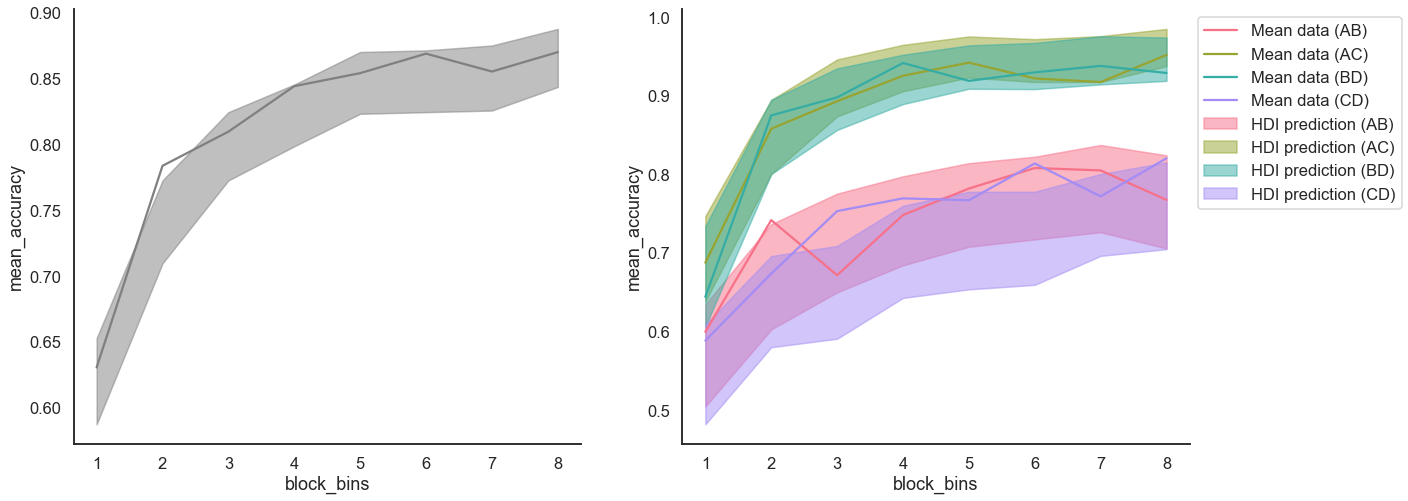

In [17]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(20,8))

model_fit.plot_mean_grouped_posterior_predictives(grouping_vars=['block_bins'], n_posterior_predictives=500, ax=axes[0])

model_fit.plot_mean_grouped_posterior_predictives(grouping_vars=['block_bins', 'choice_pair'], n_posterior_predictives=500, ax=axes[1])

sns.despine()